<a href="https://colab.research.google.com/github/plotia/Computational-Methods-for-Biological-Modelling-and-Simulation/blob/main/HW3_02_712_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Susceptible, Infected, Recovered model for Zombie attack

Q3 d & e

In [ ]:
import numpy as np
import random
# A function for finding time taken to eliminate all zombies along with S and R values
# Note: There is no zombie killing here
def survival(λ_1, λ_2, N, m):
  S = N - m
  I = m
  R = 0
  # Simulation loop
  time = 0

  while I > 0:
    # Calculate transition rates
    infection_rate = λ_1 * (I * S) / N
    death_rate = λ_2 * I
    total_rate = infection_rate + death_rate

    def exponential_random_variable(rate):
      return np.random.exponential(scale=1/rate, size=1)

    # Determine time to next event
    time_step = exponential_random_variable(total_rate)
    time += time_step

    if random.random() < infection_rate / total_rate:
      # Infection event
      if S > 0:
        S -= 1
        I += 1
    else:
      # Death event
      if I > 0:
        I -= 1
        R += 1

  print("Final population counts:")
  print("  Susceptible (S):", S)
  print("  Infected (I):", I)
  print("  Removed (R):", R)

  return print(time)

In [ ]:
survival(4, 1, 100, 25) #Using the function over example values

Final population counts:
  Susceptible (S): 2
  Infected (I): 0
  Removed (R): 98
[4.50493672]


## Q3 d

In [1]:
import numpy as np
import random

def chances_of_no_survival(λ_1, λ_2, λ_3, N, m, t):
    f = 0  # Counter for times when S = 0 at the end of the run

    # Run the simulation for t times
    for _ in range(t):
        # Initial values for each simulation
        S = N - m
        I = m
        R = 0
        time = 0

        # Simulation loop
        while I > 0:
            # Calculate transition rates
            infection_rate = λ_1 * (I * S) / N
            zombie_killing_rate = (λ_3 * I * S) / (S + I + R)
            death_rate = λ_2 * I
            total_rate = infection_rate + death_rate + zombie_killing_rate

            def exponential_random_variable(rate):
                return np.random.exponential(scale=1/rate, size=1)

            # Determine time to next event
            time_step = exponential_random_variable(total_rate)
            time += time_step

            # Determine event type
            if random.random() < infection_rate / total_rate:
                # Infection event
                if S > 0:
                    S -= 1
                    I += 1
            else:
                # Death event
                if I > 0:
                    I -= 1
                    R += 1

        # Check if S = 0 at the end of this run. If zombies are alive, thats not an issue as they will die over time.
        if S == 0:
            f += 1

    # Return the fraction f/t
    return print(f'The probability that no person survives is {f/t*100}%') # This print statement was also unnecessarily indented

In [2]:
chances_of_no_survival(1.5,0.001,1,10000,100,100)

The probability that no person survives is 100.0%


In [3]:
chances_of_no_survival(1.5,0.01,1,10000,100,100)

The probability that no person survives is 100.0%


In [7]:
chances_of_no_survival(1.5,0.04,1,10000,100,100)

The probability that no person survives is 95.0%


In [10]:
chances_of_no_survival(1.5,0.045,1,10000,100,100)

The probability that no person survives is 89.0%


In [8]:
chances_of_no_survival(1.5,0.05,1,10000,100,100)

The probability that no person survives is 68.0%


In [11]:
chances_of_no_survival(1.5,0.055,1,10000,100,100)

The probability that no person survives is 35.0%


In [9]:
chances_of_no_survival(1.5,0.06,1,10000,100,100)

The probability that no person survives is 15.0%


In [12]:
chances_of_no_survival(1.5,0.1,1,10000,100,100)

The probability that no person survives is 0.0%


In [17]:
lambda2 = np.array([0.001, 0.01, 0.04, 0.045, 0.05, 0.055, 0.06, 0.1, 1, 10, 100])
for i in lambda2:
 print(f'{chances_of_no_survival(1.5,i,1,10000,100,100)} λ_2 = {i}')

The probability that no person survives is 100.0%
None λ_2 = 0.001
The probability that no person survives is 100.0%
None λ_2 = 0.01
The probability that no person survives is 97.0%
None λ_2 = 0.04
The probability that no person survives is 91.0%
None λ_2 = 0.045
The probability that no person survives is 69.0%
None λ_2 = 0.05
The probability that no person survives is 46.0%
None λ_2 = 0.055
The probability that no person survives is 19.0%
None λ_2 = 0.06
The probability that no person survives is 0.0%
None λ_2 = 0.1
The probability that no person survives is 0.0%
None λ_2 = 1.0
The probability that no person survives is 0.0%
None λ_2 = 10.0
The probability that no person survives is 0.0%
None λ_2 = 100.0


In [19]:
#Removing print from code for plotting
def percent_no_survival(λ_1, λ_2, λ_3, N, m, t):
    f = 0  # Counter for times when S = 0 at the end of the run

    # Run the simulation for t times
    for _ in range(t):
        # Initial values for each simulation
        S = N - m
        I = m
        R = 0
        time = 0

        # Simulation loop
        while I > 0:
            # Calculate transition rates
            infection_rate = λ_1 * (I * S) / N
            zombie_killing_rate = (λ_3 * I * S) / (S + I + R)
            death_rate = λ_2 * I
            total_rate = infection_rate + death_rate + zombie_killing_rate

            def exponential_random_variable(rate):
                return np.random.exponential(scale=1/rate, size=1)

            # Determine time to next event
            time_step = exponential_random_variable(total_rate)
            time += time_step

            # Determine event type
            if random.random() < infection_rate / total_rate:
                # Infection event
                if S > 0:
                    S -= 1
                    I += 1
            else:
                # Death event
                if I > 0:
                    I -= 1
                    R += 1

        # Check if S = 0 at the end of this run. If zombies are alive, thats not an issue as they will die over time.
        if S == 0:
            f += 1

    # Return the fraction f/t
    return (f * 100)/t

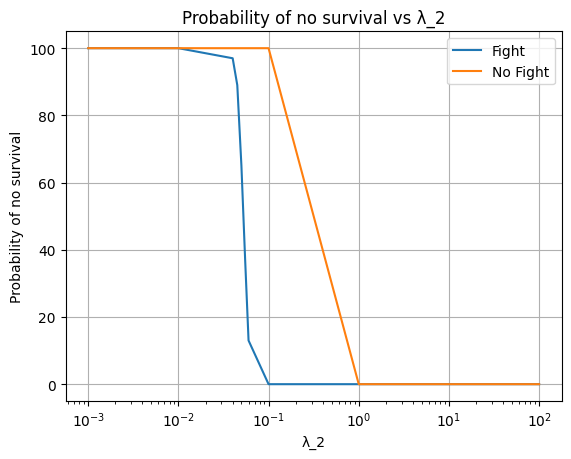

In [21]:
import matplotlib.pyplot as plt

X = []
Y_fight = []
Y_no_fight = []
for i in lambda2:
  X.append(i)
  Y_fight.append(percent_no_survival(1.5,i,1,10000,100,100))
  Y_no_fight.append(percent_no_survival(1.5,i,0,10000,100,100))

plt.plot(X, Y_fight, label='Fight')
plt.plot(X, Y_no_fight, label='No Fight')
plt.xlabel('λ_2')
plt.xscale('log')
plt.ylabel('Probability of no survival')
plt.title('Probability of no survival vs λ_2')
plt.legend()
plt.grid(True)
plt.show()